<a href="https://colab.research.google.com/github/guilhermecarva/guilhermecarva/blob/main/ML_Regressao_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<br><br>

### Considere o dataset abaixo:

In [ ]:
import pandas as pd
df = pd.read_csv("dataframe_exercicio_modulo_8.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br>
<br>

# Exercícios

<br>

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste.

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)



## Parte 2:

### 1 -

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting.

### 2 -

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.



In [ ]:
#PARTE 1

def divisao(csv, percent_test):
    df = pd.read_csv(csv)
    dff = df.copy()
    size = dff.shape[0]
    treino = int(size*(1-percent_test/100))
    teste = size-treino
    df_treino = dff.iloc[:treino,:]
    df_teste = dff.iloc[treino:,:]

    return df_treino, df_teste


In [ ]:
df_treino , df_teste = divisao('dataframe_exercicio_modulo_8.csv',30)

In [ ]:
df_treino

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47
...,...,...,...,...,...
1717,2.0,33.214999,66.554431,7.0,5
1718,4.0,27.379961,92.088951,3.0,279
1719,1.0,1.921977,24.877278,3.0,99
1720,1.0,27.552167,94.877554,2.0,248


In [ ]:
df_teste

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
1722,1.0,32.142413,78.007421,6.0,12
1723,4.0,19.595819,90.968914,6.0,296
1724,5.0,17.063139,86.412978,2.0,427
1725,2.0,14.741844,90.977796,7.0,272
1726,3.0,6.364912,47.630039,9.0,65
...,...,...,...,...,...
2455,1.0,3.507206,56.070224,1.0,231
2456,4.0,28.222931,46.858543,3.0,18
2457,1.0,13.055995,87.372664,9.0,217
2458,2.0,22.632517,46.170517,6.0,42


In [ ]:
#PARTE 2
#1
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

df.corr()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
ind_pop_cid,1.000000,0.016876,-0.072930,-0.000852,0.067237
perc_pol,0.016876,1.000000,0.399212,-0.055423,-0.377929
taxa_crim,-0.072930,0.399212,1.000000,0.097896,0.578659
nivel_ed,-0.000852,-0.055423,0.097896,1.000000,-0.200762
crimes,0.067237,-0.377929,0.578659,-0.200762,1.000000


In [ ]:
def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [ ]:
# utilizarei a taxa_crim como variável por ter a mior correlação

In [ ]:
def plota_curva_regressao(X, y, X_teste, y_teste, modelo, nome_modelo):

    modelo.fit(X, y)

    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_teste = modelo.predict(X_teste)

    rmse_dataset_treino = np.round(RMSE(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_teste = np.round(RMSE(y = y_teste, y_pred = predicao_dataset_teste), 2)

    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X, y, c = 'gray', s = 100)
    plt.plot(X, predicao_dataset_treino, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TESTE: " + str(rmse_dataset_teste),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X_teste, y_teste, c = 'gray', s = 100)
    plt.plot(X_teste, predicao_dataset_teste, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

In [ ]:
X = df_treino['taxa_crim'].values.reshape(-1,1)
y = df_treino['crimes'].values
X_teste = df_teste['taxa_crim'].values.reshape(-1,1)
y_teste = df_teste['crimes'].values

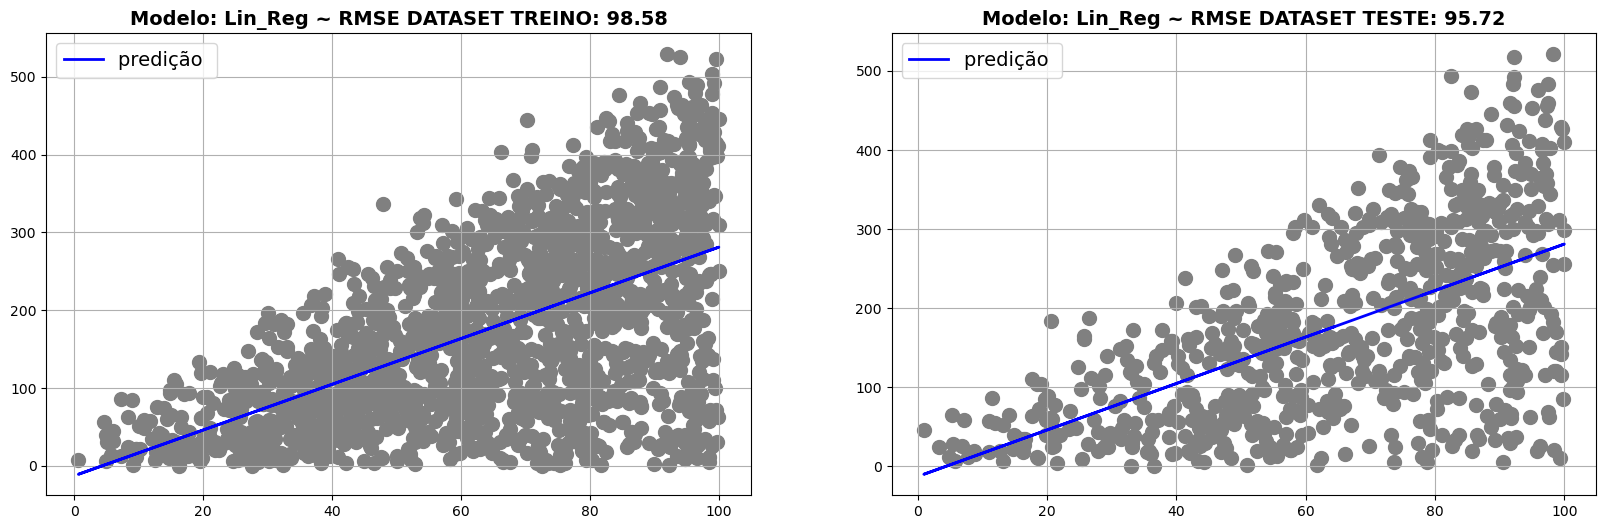

In [ ]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, X_teste, y_teste, modelo, nome_modelo)

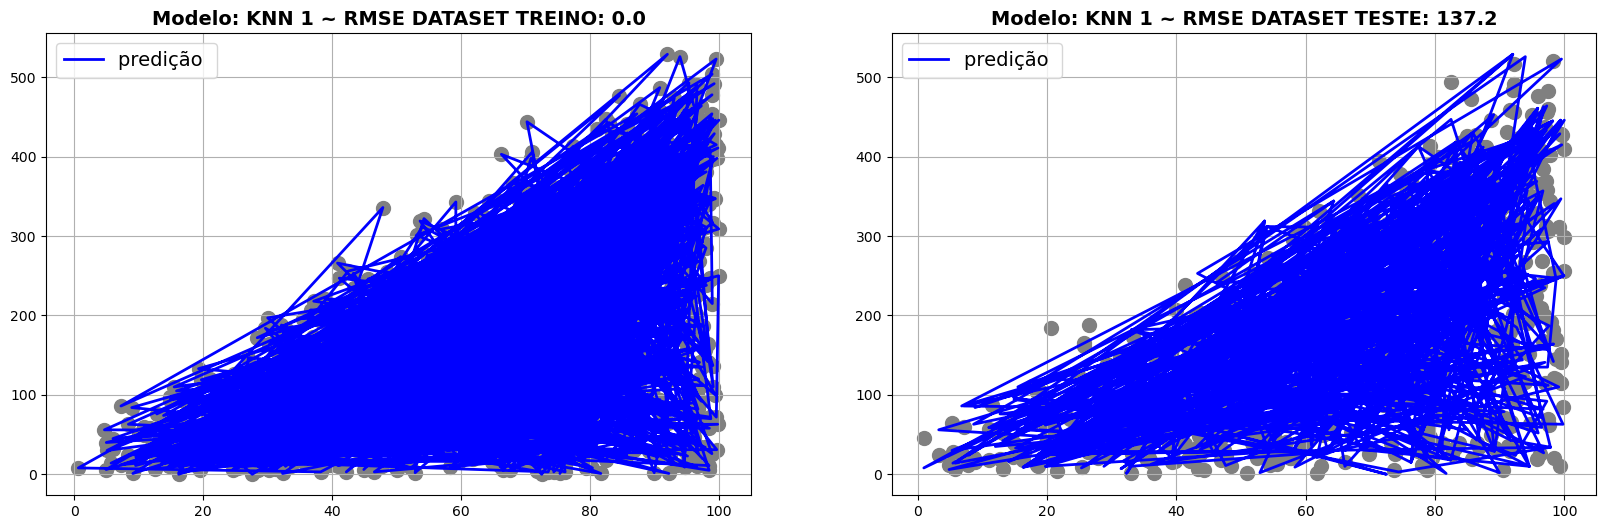

In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 1)
nome_modelo = 'KNN 1'
plota_curva_regressao(X, y, X_teste, y_teste, modelo, nome_modelo)

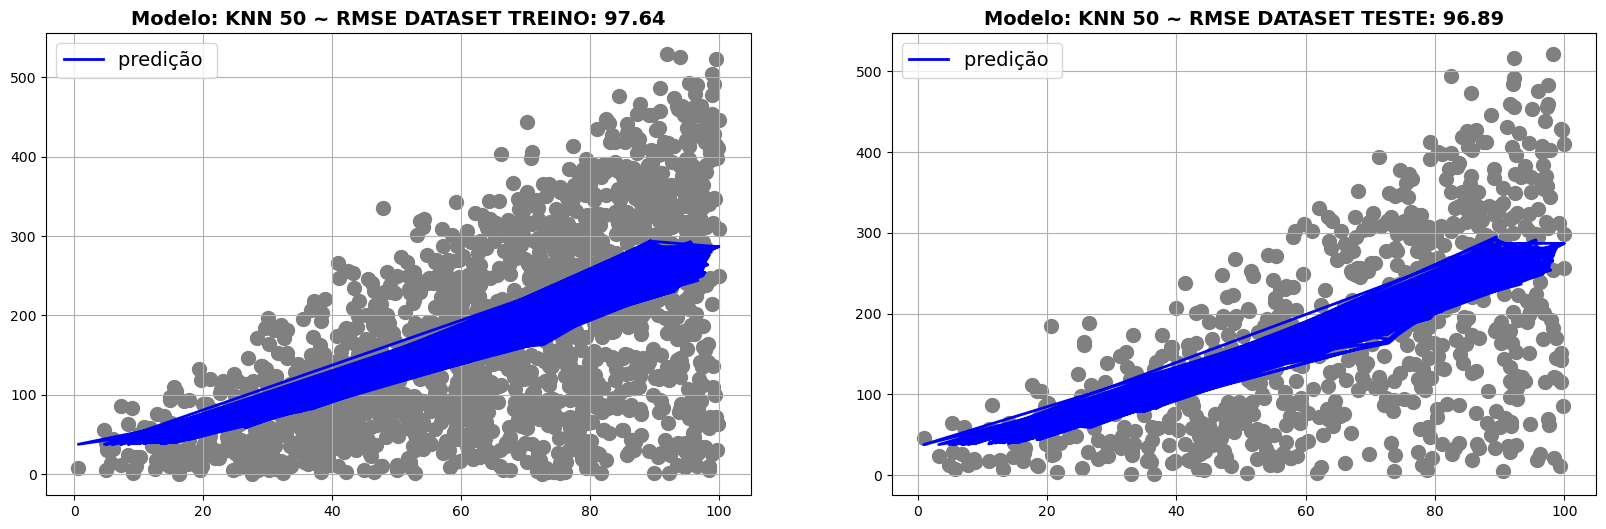

In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 50)
nome_modelo = 'KNN 50'
plota_curva_regressao(X, y, X_teste, y_teste, modelo, nome_modelo)

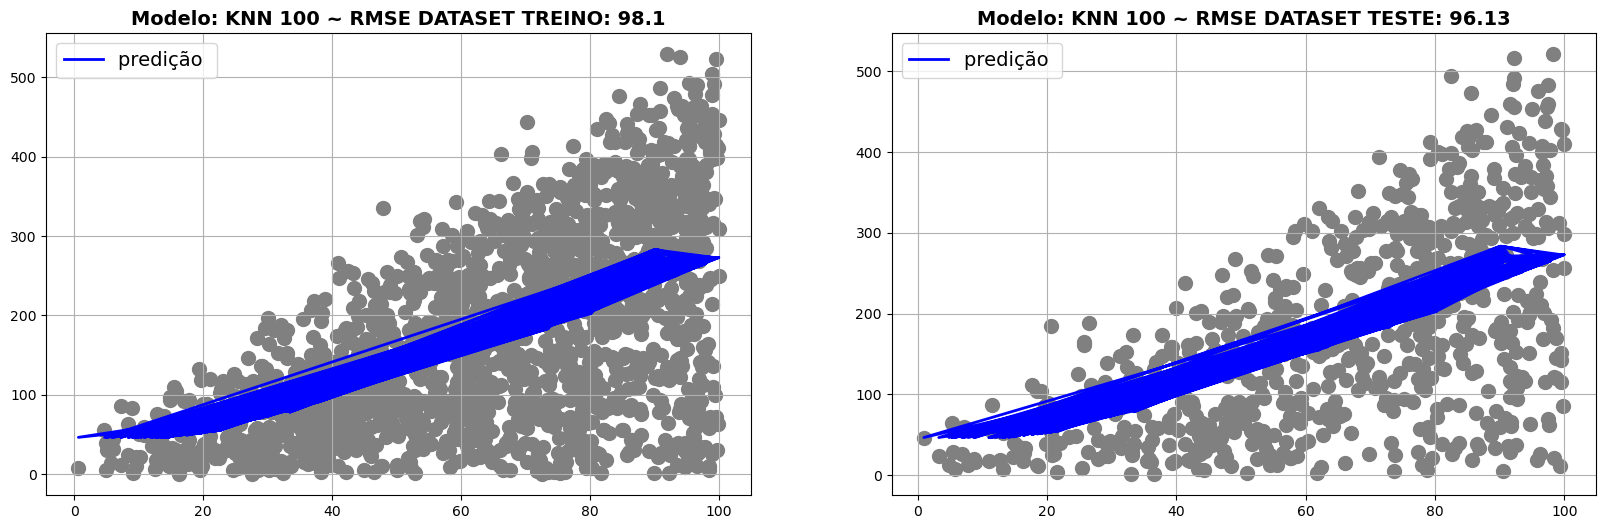

In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 100)
nome_modelo = 'KNN 100'
plota_curva_regressao(X, y, X_teste, y_teste, modelo, nome_modelo)

In [ ]:
#podemos observar que o modelo KNN com vizinhos = 1 sofreu overfitting, ou seja, não generalizou bem.

In [ ]:
#PARTE 2
#2
#Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados

In [ ]:
df.columns

Index(['ind_pop_cid', 'perc_pol', 'taxa_crim', 'nivel_ed', 'crimes'], dtype='object')

In [ ]:
X = df_treino[['ind_pop_cid', 'perc_pol', 'taxa_crim', 'nivel_ed']].values.reshape(-4,4)
y = df_treino['crimes'].values
X_teste = df_teste[['ind_pop_cid', 'perc_pol', 'taxa_crim', 'nivel_ed']].values.reshape(-4,4)
y_teste = df_teste['crimes'].values

In [ ]:
def regressao(X, y, X_teste, y_teste, modelo, nome_modelo):

    modelo.fit(X, y)

    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_teste = modelo.predict(X_teste)

    rmse_dataset_treino = np.round(RMSE(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_teste = np.round(RMSE(y = y_teste, y_pred = predicao_dataset_teste), 2)

    print("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino))
    print("Modelo: " + nome_modelo + " ~ RMSE DATASET TESTE: " + str(rmse_dataset_teste))

In [ ]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
regressao(X, y, X_teste, y_teste, modelo, nome_modelo)

Modelo: Lin_Reg ~ RMSE DATASET TREINO: 37.5
Modelo: Lin_Reg ~ RMSE DATASET TESTE: 34.97


In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 1)
nome_modelo = 'KNN 1'
regressao(X, y, X_teste, y_teste, modelo, nome_modelo)

Modelo: KNN 1 ~ RMSE DATASET TREINO: 0.0
Modelo: KNN 1 ~ RMSE DATASET TESTE: 45.26


In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 10)
nome_modelo = 'KNN 10'
regressao(X, y, X_teste, y_teste, modelo, nome_modelo)

Modelo: KNN 10 ~ RMSE DATASET TREINO: 31.18
Modelo: KNN 10 ~ RMSE DATASET TESTE: 34.46


In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 50)
nome_modelo = 'KNN 50'
regressao(X, y, X_teste, y_teste, modelo, nome_modelo)

Modelo: KNN 50 ~ RMSE DATASET TREINO: 38.65
Modelo: KNN 50 ~ RMSE DATASET TESTE: 39.11


In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 100)
nome_modelo = 'KNN 100'
regressao(X, y, X_teste, y_teste, modelo, nome_modelo)

Modelo: KNN 100 ~ RMSE DATASET TREINO: 44.89
Modelo: KNN 100 ~ RMSE DATASET TESTE: 44.37


In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 5)
nome_modelo = 'KNN 5'
regressao(X, y, X_teste, y_teste, modelo, nome_modelo)

Modelo: KNN 5 ~ RMSE DATASET TREINO: 28.57
Modelo: KNN 5 ~ RMSE DATASET TESTE: 34.74


In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 20)
nome_modelo = 'KNN 20'
regressao(X, y, X_teste, y_teste, modelo, nome_modelo)

Modelo: KNN 20 ~ RMSE DATASET TREINO: 33.75
Modelo: KNN 20 ~ RMSE DATASET TESTE: 35.44


In [ ]:
# novamente KNN = 1 mostra que gera overfitting.